# Resampling, Modelling 

In [2]:
# Import all libraries and modules
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import rc
colors = sns.color_palette("colorblind")

## Transformation
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## Downsampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC


## Modelling 
from sklearn import datasets, decomposition, ensemble, feature_selection, linear_model, metrics, model_selection, preprocessing, svm, tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, make_scorer, confusion_matrix, explained_variance_score, f1_score, mean_absolute_error, mean_squared_error, precision_score, r2_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, GridSearchCV, ShuffleSplit, train_test_split, RandomizedSearchCV
from sklearn.calibration import calibration_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
# from xgboost import XGBClassifier
# import xgboost as xgb
import pickle

import shap

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import time

import utilityfunctions as uf

import os

print('Libraries imported successfully')


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Libraries imported successfully


In [30]:
# set the style for the notebook, in this case colorblind, alternative would be grayscale
uf.set_custom_palette("colorblind")
# Define the path for saving the figures
figures_folder = '../reports/figures' 
# Define the path for saving the models
models_folder = '../models'

In [27]:
# Set random seed for NumPy
np.random.seed(42)

In [4]:
# Reading MIT-BIH Arrhythmia Dataset 
df = pd.read_csv('MIT-BIH Arrhythmia Database.csv') 
print(df.shape)
df.head(10)

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
5,101,N,344,324.0,-0.083040,-0.293023,0.931546,-0.433485,-0.088745,22,...,-0.036339,8,10,19,1,-0.036339,-0.034673,-0.026985,-0.022147,-0.013531
6,101,N,324,313.0,-0.067520,-0.286934,1.050545,-0.482886,-0.074666,23,...,-0.032788,27,10,45,8,-0.032788,-0.017467,0.013925,0.035176,0.016576
7,101,N,313,313.0,-0.085844,-0.341904,1.154904,-0.439149,-0.094663,22,...,-0.008229,8,2,21,11,-0.008229,-0.011703,-0.024895,-0.034285,-0.054572
8,101,N,313,310.0,-0.061510,-0.257011,1.107787,-0.385508,-0.065044,25,...,-0.029834,21,31,61,9,-0.029834,-0.020603,0.004411,0.025997,0.015942
9,101,N,310,329.0,-0.063513,-0.319736,1.087343,-0.425738,-0.074461,22,...,0.018915,15,2,26,9,0.018915,0.010747,0.000927,-0.018538,-0.060157


# Correlation Analysis

In [14]:
X = df.drop('type', axis=1)

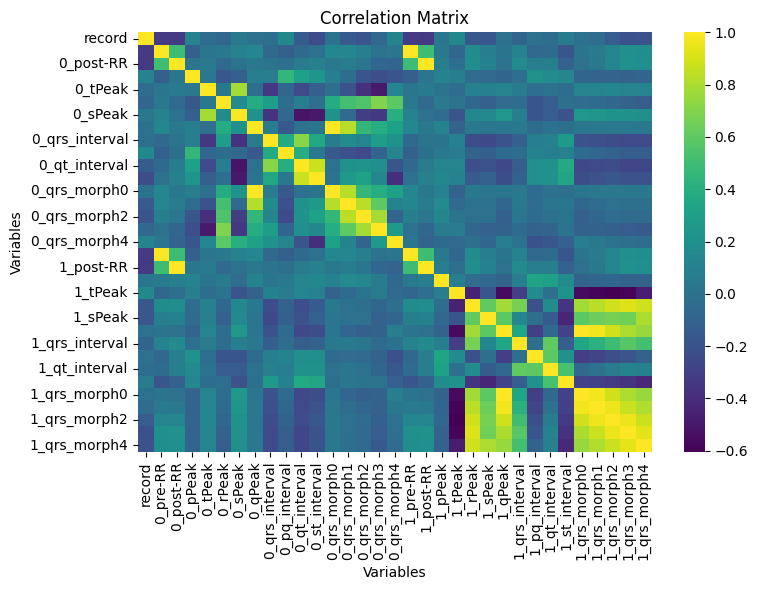

In [15]:
# Compute the correlation matrix for numeric columns only
correlation_matrix = X.corr()

# Create heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='viridis')

# Customize plot
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Save the plot with appropriate prefix in the proper folder
filename = 'mit_correlation_matrix.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

# Show plot
plt.tight_layout()
plt.show()

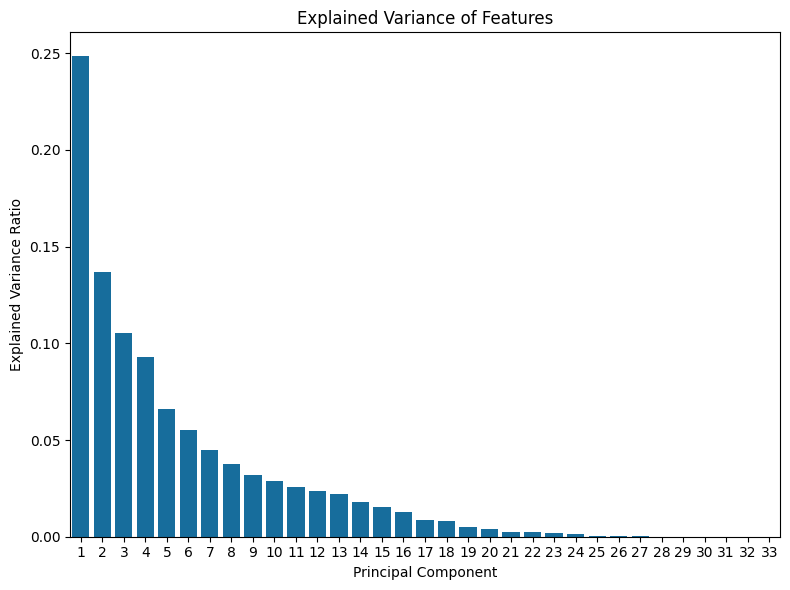

In [9]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio)

# Customize plot
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Features')

# Save the plot with appropriate prefix in the proper folder
filename = 'mit_explained_variance_ratio.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

# Show plot
plt.tight_layout()
plt.show()

In [16]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Define the threshold for high correlation
threshold = 0.80

# Find highly correlated features
highly_correlated_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
highly_correlated_pairs = highly_correlated_pairs.unstack().reset_index()
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs[0]]

# Extract unique pairs of highly correlated features
correlated_feature_pairs = []
for index, row in highly_correlated_pairs.iterrows():
    pair = tuple(sorted([row['level_0'], row['level_1']]))
    if pair not in correlated_feature_pairs:
        correlated_feature_pairs.append(pair)

# Plot highly correlated features before removal
#print("Highly Correlated Features Before Removal:")
#for pair in correlated_feature_pairs:
#    sns.pairplot(df, vars=pair, kind='scatter')
#    plt.suptitle(f'Highly Correlated Features: {pair[0]} vs {pair[1]}')
#    plt.show()
#    print(pair)

In [17]:
# Decide which features to remove (in this example, removing one of each pair)
features_to_remove = set()
for pair in correlated_feature_pairs:
    features_to_remove.add(pair[1])  # You can choose which feature to remove based on your criteria

# Remove the features
df_filtered = df.drop(columns=features_to_remove)

# Print the DataFrame after removing highly correlated features
print("\nDataFrame after removing highly correlated features:")
df_filtered.head(10)



DataFrame after removing highly correlated features:


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_post-RR,1_pPeak,1_tPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,313.0,0.038310,0.025784,0.025271,0.025930,2,18,22,2,0.025930
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,315.0,0.014264,0.045458,-0.104503,-0.042009,26,27,62,9,-0.042009
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,321.0,0.021311,0.008246,0.008230,0.009528,3,8,12,1,0.009528
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,336.0,-0.000665,-0.009725,-0.010203,-0.020536,6,9,16,1,-0.020536
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,344.0,0.024559,0.016925,-0.099918,0.016053,16,5,31,10,0.016053
5,101,N,344,324.0,-0.083040,-0.293023,0.931546,-0.433485,-0.088745,22,...,324.0,-0.007309,-0.007667,-0.008262,-0.036339,8,10,19,1,-0.036339
6,101,N,324,313.0,-0.067520,-0.286934,1.050545,-0.482886,-0.074666,23,...,313.0,-0.012953,0.021448,-0.059658,-0.032788,27,10,45,8,-0.032788
7,101,N,313,313.0,-0.085844,-0.341904,1.154904,-0.439149,-0.094663,22,...,313.0,-0.006434,0.046100,-0.065032,-0.008229,8,2,21,11,-0.008229
8,101,N,313,310.0,-0.061510,-0.257011,1.107787,-0.385508,-0.065044,25,...,310.0,0.024459,0.020524,-0.037869,-0.029834,21,31,61,9,-0.029834
9,101,N,310,329.0,-0.063513,-0.319736,1.087343,-0.425738,-0.074461,22,...,329.0,0.019993,0.006456,-0.081985,0.018915,15,2,26,9,0.018915


In [18]:
df = df_filtered

# Move 'Q' Unknown Beats into seperat dataset

In [19]:
unknown_beats = df[df['type'] == 'Q']
#unknown_beats
df.drop(df[df['type'] == 'Q'].index, inplace=True)

# Create binary target variable from type column

In [20]:
unique_types = df['type'].unique()
print(unique_types)
print(df.shape)

# Create binary target variable 
df['label'] = df['type'].apply(lambda x: 0 if x == 'N' else 1)
df.drop(['type', 'record'], axis=1, inplace=True)

# Print the value counts of the new 'class' column
print(df['label'].value_counts())

['N' 'SVEB' 'VEB' 'F']
(100674, 26)
label
0    90083
1    10591
Name: count, dtype: int64


# Scaling of features

In [21]:
# Separate features and target variable
X = df.drop(['label'], axis=1)  # Features
y = df['label']  # Target variable

# Scaling of features 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(scaler.scale_)

[0.00047551 0.00047438 0.14460252 0.163272   0.15645161 0.13086489
 0.16570164 0.00588235 0.00671141 0.00303951 0.16570164 0.16077164
 0.17486125 0.00047551 0.00047438 0.13755979 0.10530541 0.10556911
 0.10509129 0.00384615 0.00543478 0.002457   0.0046729  0.10509129]


# Downsampling

In [22]:
# Downsample the majority class
majority_class = df[df['label'] == 0]
minority_class = df[df['label'] == 1]
downsampled_majority = resample(majority_class, 
                                replace=False,    
                                n_samples=len(minority_class),  
                                random_state=42)  

# Combine minority class with downsampled majority class
balanced_df = pd.concat([downsampled_majority, minority_class])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df.shape


(21182, 25)

# Seperate Features and Target after Downsampling

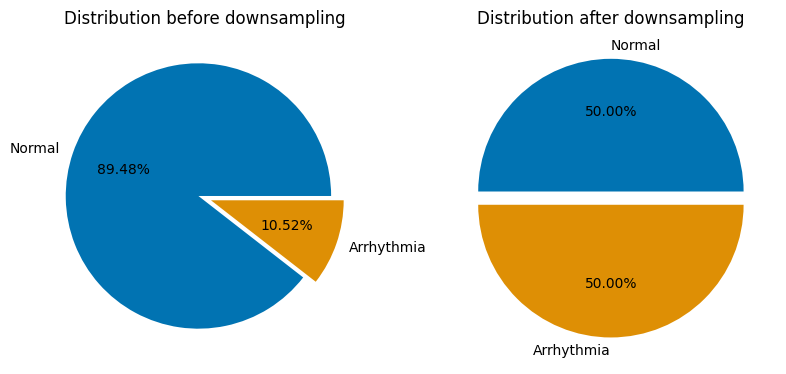

In [26]:
# Create pie chart for the distribution before downsampling
label_counts_original = np.bincount(df['label'].astype(int))
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create subplots

# Plot the first pie chart
axs[0].pie(label_counts_original, labels=['Normal', 'Arrhythmia'], explode=[0.05, 0.05], autopct="%0.2f%%")
axs[0].set_title('Distribution before downsampling')

# Separate features and target variable after downsampling
X_balanced = balanced_df.drop(['label'], axis=1)  # Features
y_balanced = balanced_df['label']  # Target variable

# Create pie chart for the distribution after downsampling
label_counts_ds = np.bincount(balanced_df['label'].astype(int))

# Plot the second pie chart
axs[1].pie(label_counts_ds, labels=['Normal', 'Arrhythmia'], explode=[0.05, 0.05], autopct="%0.2f%%")
axs[1].set_title('Distribution after downsampling')

plt.tight_layout()  # Adjust layout for better spacing

# Save the plot with appropriate prefix in the proper folder
filename = 'mit_piecharts_before_after_downsampling.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()


# Splitting the dataset

In [24]:
# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print('Shape of X_train after downsampling:', X_train.shape)
print('Shape of y_train after downsampling:', y_train.shape)
print('Shape of X_test after downsampling:', X_test.shape)
print('Shape of y_test after downsampling:', y_test.shape)

Shape of X_train after downsampling: (16945, 24)
Shape of y_train after downsampling: (16945,)
Shape of X_test after downsampling: (4237, 24)
Shape of y_test after downsampling: (4237,)


# Modelling

# Definition of Classifiers and Hyperparameters for RandomizedSearch

In [28]:
# Define classifiers with specified parameters
clf_lr = LogisticRegression(max_iter=5000)
clf_rf = RandomForestClassifier()
clf_svc = SVC()
clf_en = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)
clf_gb = GradientBoostingClassifier()
clf_ada = AdaBoostClassifier()
#clf_xgb = xgb.XGBClassifier()

# Define parameter grids for each classifier
param_grid_lr = {'C': np.logspace(-4, 2, 9), 'penalty': ['l1', 'l2']}
param_grid_rf = {'n_estimators': [10, 50, 100, 250, 500, 1000], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt', 'log2']}
param_grid_svc = {'C': np.logspace(-4, 2, 9), 'kernel': ['linear', 'rbf']}
param_grid_en = {'C': np.logspace(-4, 2, 9), 'l1_ratio': np.linspace(0.1, 0.9, 9)}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
#param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}

print('parameters set')

parameters set


# Logistic Regression

In [31]:
# Logistic Regression
print("Logistic Regression")

# Perform hyperparameter tuning for LogReg
best_params_lr, train_metrics_lr, \
test_metrics_lr, elapsed_total_lr = uf.perform_randomized_search(
    clf_lr,  param_grid_lr, 
    X_train, y_train, 
    X_test, y_test)

# Fit the model with the best hyperparameters
clf_lr_best = LogisticRegression(**best_params_lr)
clf_lr_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_lr = clf_lr_best.predict(X_train)
test_predictions_lr = clf_lr_best.predict(X_test)

# Store results 
lr_results = {
    'best_params': best_params_lr,
    'train_metrics': train_metrics_lr,
    'test_metrics': test_metrics_lr,
    'elapsed_total': elapsed_total_lr,
    'test_predictions': test_predictions_lr,
}

# Save the model 
model_name = 'mit_logistic_regression_model.pkl'
model_path = os.path.join(models_folder, model_name)
with open(model_path, 'wb') as f:
    pickle.dump(clf_lr_best, f)

# Displaying the model metrics
print("Best Parameters:", best_params_lr)
uf.display_metrics('Logistic Regression', train_metrics_lr, test_metrics_lr)

Logistic Regression
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.4s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.4s
[CV] END ................C=0.0031622776601683794, penalty=l2; total time=   1.5s
[CV] END ................C=0.0031622776601683794, penalty=l2; total time=  

NameError: name 'pickle' is not defined

# RandomForest

Random Forest
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Searching...
Best Parameters: {'n_estimators': 250, 'min_samples_leaf': 1, 'max_features': 'log2'}

Random Forest



,accuracy,precision,recall,f1,roc_auc
Train,1.0000,1.0000,1.0000,1.0000,1.0000
Test,0.9759,0.9758,0.9758,0.9758,0.9759


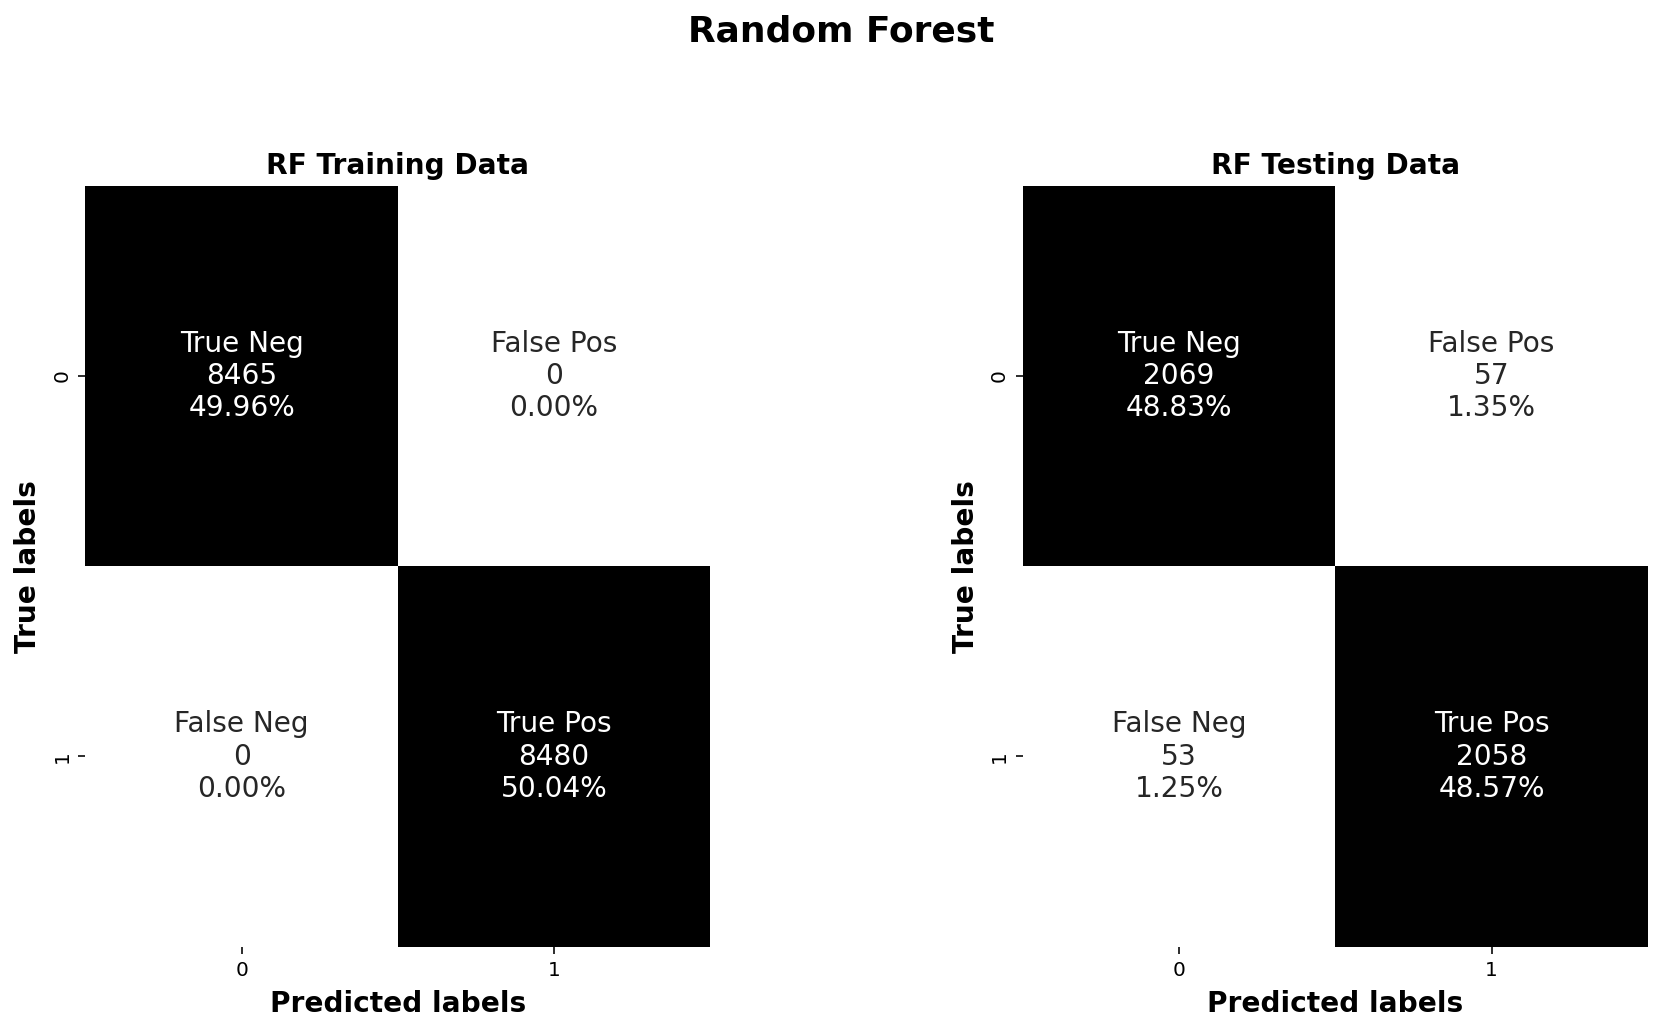

In [20]:
print("Random Forest")
# Perform hyperparameter tuning for RandomForest
best_params_rf, train_metrics_rf, test_metrics_rf, elapsed_total_rf = perform_randomized_search(clf_rf, param_grid_rf, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_rf_best = RandomForestClassifier(**best_params_rf)
clf_rf_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_rf = clf_rf_best.predict(X_train)
test_predictions_rf = clf_rf_best.predict(X_test)

# Store results 
rf_results = {
    'best_params': best_params_rf,
    'train_metrics': train_metrics_rf,
    'test_metrics': test_metrics_rf,
    'elapsed_total': elapsed_total_rf,
    'test_predictions': test_predictions_rf,
}

# Displaying the model metrics
print("Best Parameters:", best_params_rf)
display_metrics('Random Forest', train_metrics_rf, test_metrics_rf)

# Plot confusion matrix for training data
titles = ['RF Training Data', 'RF Testing Data']
plot_confusion_matrices_side_by_side('Random Forest', [(y_train, train_predictions_rf), (y_test, test_predictions_rf)], titles)

# SVC

SVC
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=0.0031622776601683794, penalty=l2; total time=   1.6s
[CV] END ................C=0.0005623413251903491, penalty=l2; total time=   0.9s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ....................C=17.78279410038923, penalty=l2; total time=   4.3s
[CV] END ...................C=0.5623413251903491, penalty=l2; total time=   3.3s
[CV] END m

,accuracy,precision,recall,f1,roc_auc
Train,0.8807,0.9337,0.8198,0.8730,0.8807
Test,0.8827,0.9297,0.8271,0.8754,0.8825


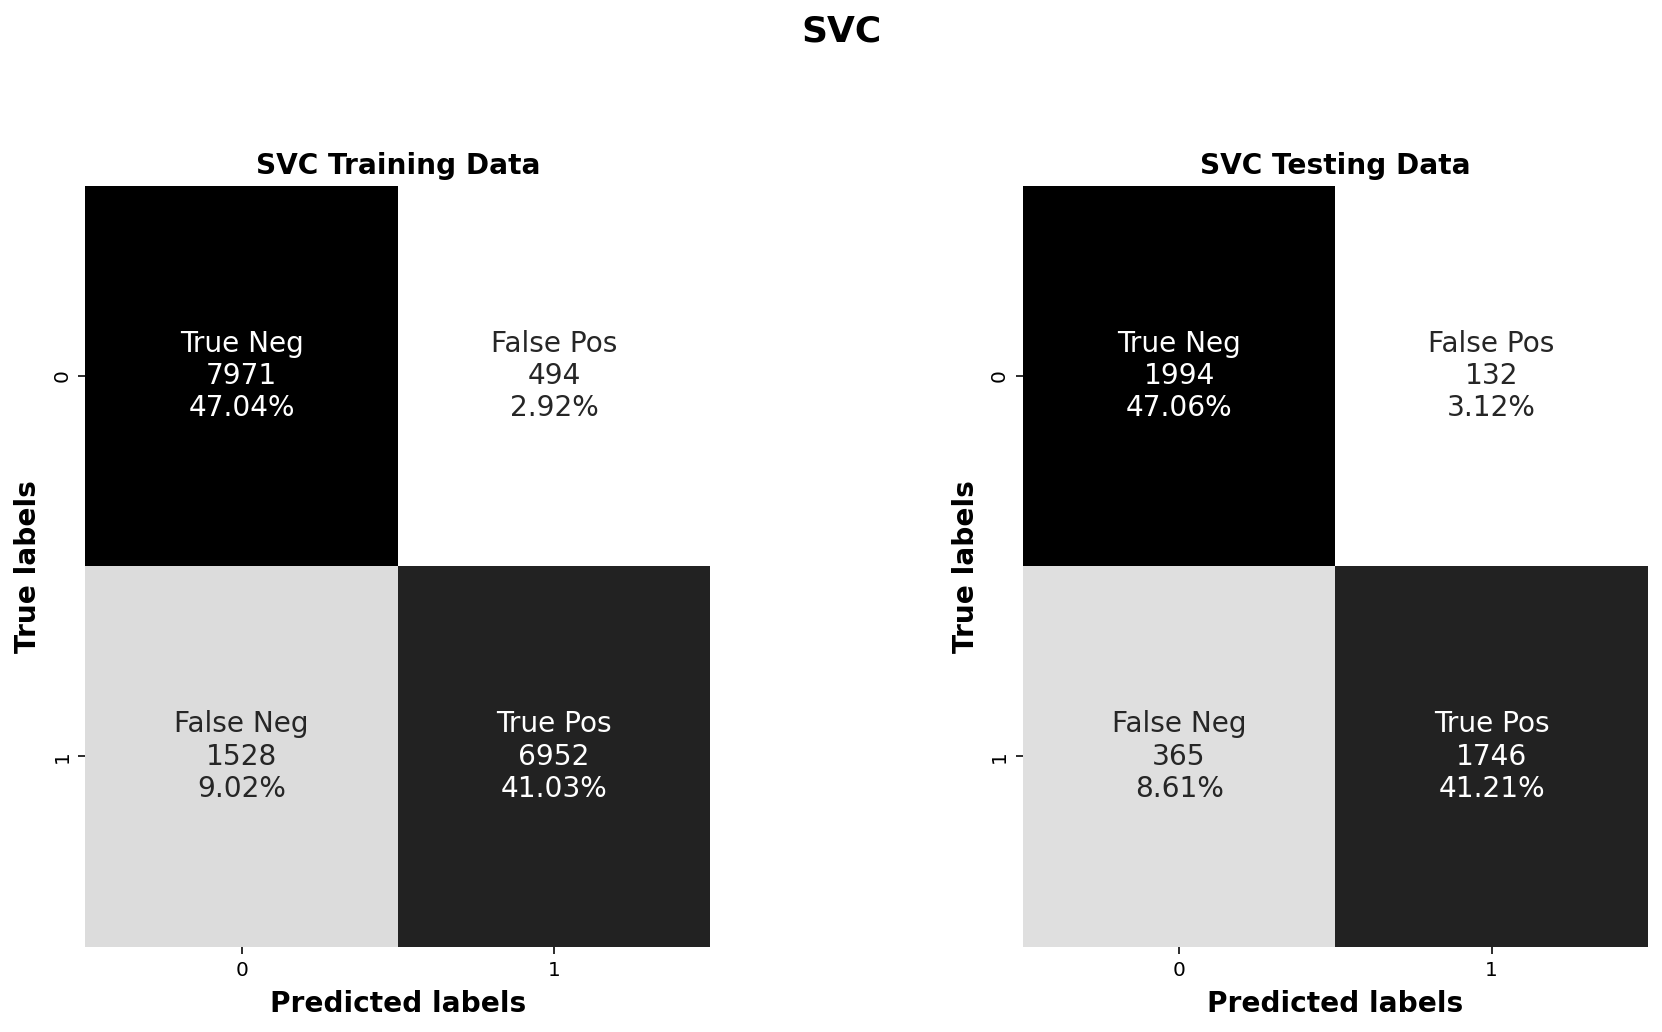

In [21]:
print("SVC")
# Perform hyperparameter tuning for RandomForest
best_params_svc, train_metrics_svc, test_metrics_svc, elapsed_total_svc = perform_randomized_search(clf_svc, param_grid_svc, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_svc_best = SVC(**best_params_svc)
clf_svc_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_svc = clf_svc_best.predict(X_train)
test_predictions_svc = clf_svc_best.predict(X_test)

# Store results 
svc_results = {
    'best_params': best_params_svc,
    'train_metrics': train_metrics_svc,
    'test_metrics': test_metrics_svc,
    'elapsed_total': elapsed_total_svc,
    'test_predictions': test_predictions_svc,
}

# Displaying the model metrics
print("Best Parameters:", best_params_svc)
display_metrics('SVC', train_metrics_svc, test_metrics_svc)

# Plot confusion matrix for training data
titles = ['SVC Training Data', 'SVC Testing Data']
plot_confusion_matrices_side_by_side('SVC', [(y_train, train_predictions_svc), (y_test, test_predictions_svc)], titles)

# ElasticNet

ElasticNet
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Searching...
Best Parameters: {'l1_ratio': 0.8, 'C': 17.78279410038923}

ElasticNet



,accuracy,precision,recall,f1,roc_auc
Train,0.8549,0.9136,0.7843,0.8440,0.8550
Test,0.8626,0.9175,0.7958,0.8524,0.8624


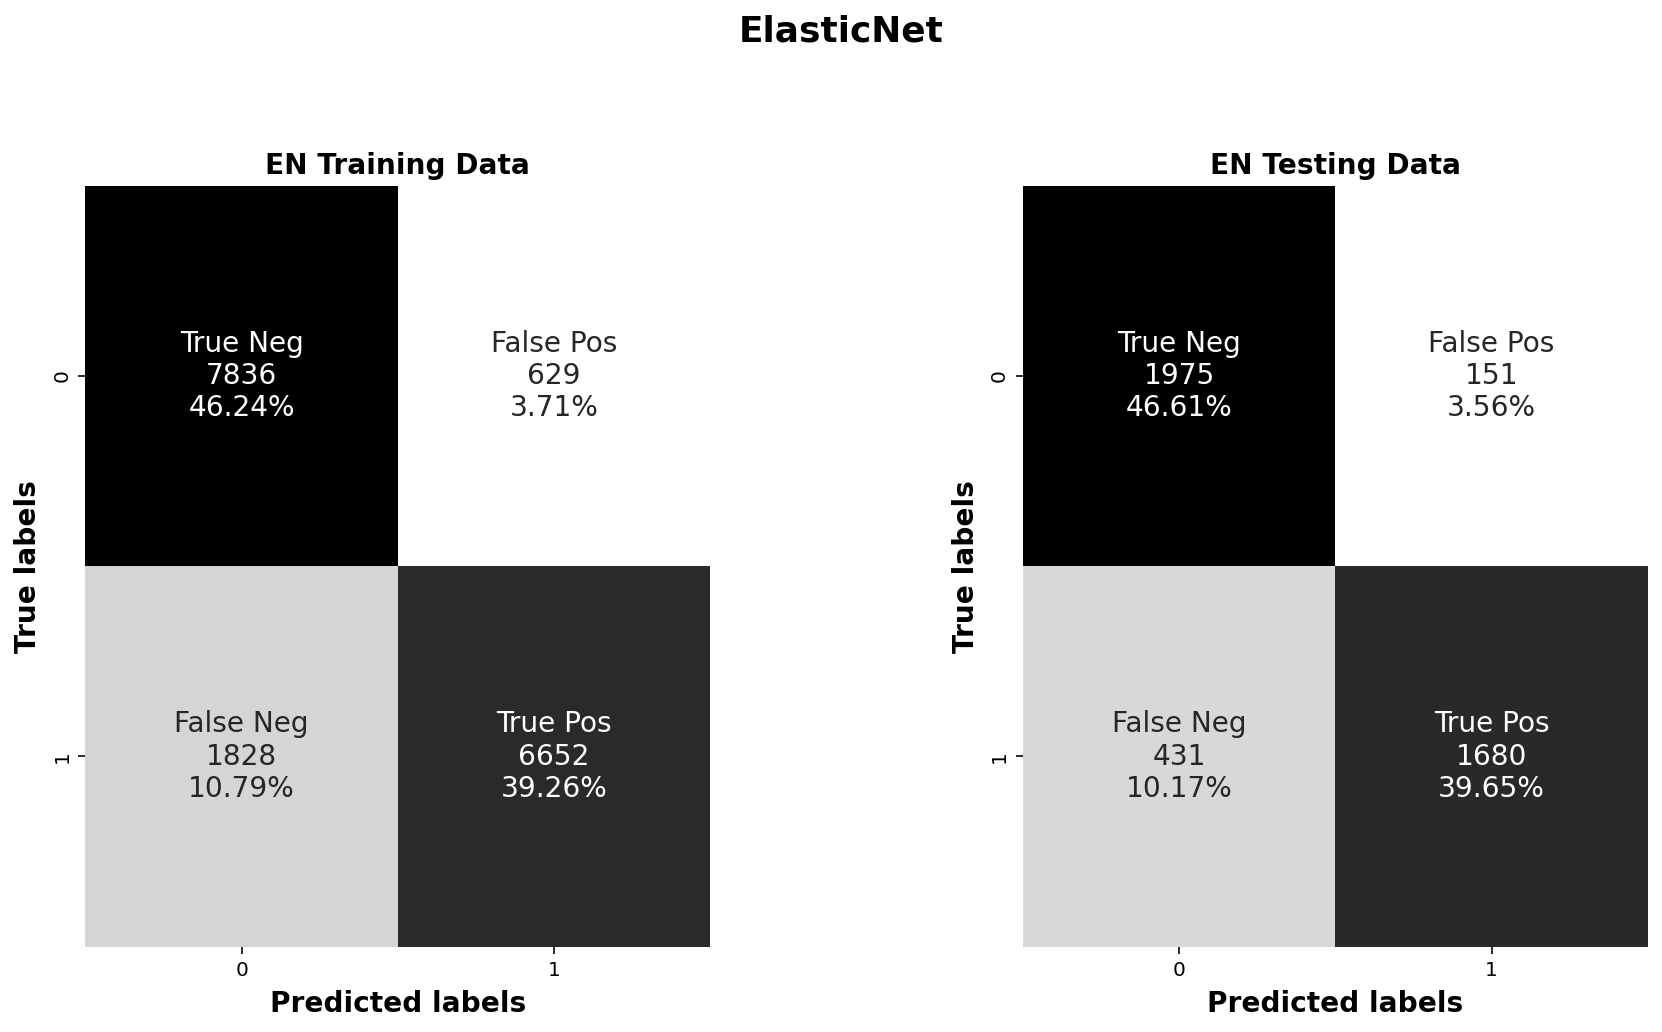

In [22]:
print("ElasticNet")
# Perform hyperparameter tuning for ElasticNet
best_params_en, train_metrics_en, test_metrics_en, elapsed_total_en = perform_randomized_search(clf_en, param_grid_en, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_en_best = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, **best_params_en)
clf_en_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_en = clf_en_best.predict(X_train)
test_predictions_en = clf_en_best.predict(X_test)

# Store results 
en_results = {
    'best_params': best_params_en,
    'train_metrics': train_metrics_en,
    'test_metrics': test_metrics_en,
    'elapsed_total': elapsed_total_en,
    'test_predictions': test_predictions_en
}

# Displaying the model metrics
print("Best Parameters:", best_params_en)
display_metrics('ElasticNet', train_metrics_en, test_metrics_en)

# Plot confusion matrix for training data
titles = ['EN Training Data', 'EN Testing Data']
plot_confusion_matrices_side_by_side('ElasticNet', [(y_train, train_predictions_en), (y_test, test_predictions_en)], titles)

# GradientBoost

Gradient Boosting Classifier
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Searching...
Best Parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}

Gradient Boost



,accuracy,precision,recall,f1,roc_auc
Train,1.0000,1.000,1.0000,1.0000,1.0000
Test,0.9809,0.981,0.9806,0.9808,0.9809


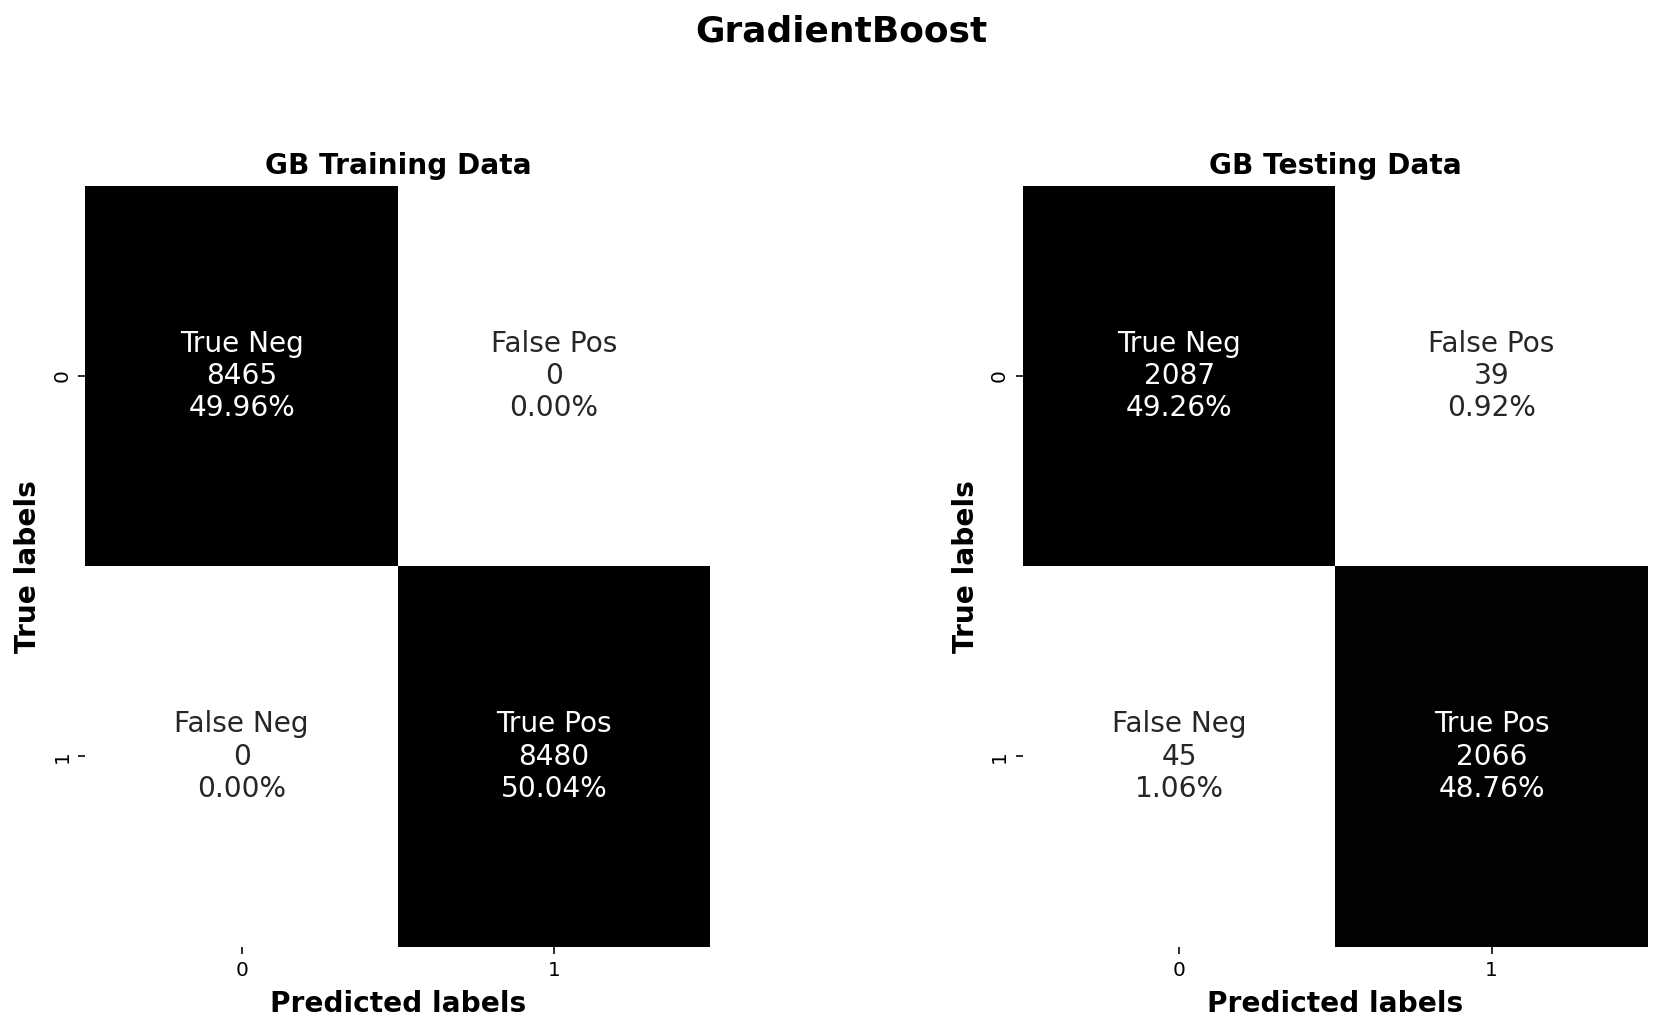

In [23]:
print("Gradient Boosting Classifier")
# Perform hyperparameter tuning for GBoost
best_params_gb, train_metrics_gb, test_metrics_gb, elapsed_total_gb = perform_randomized_search(clf_gb, param_grid_gb, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_gb_best = GradientBoostingClassifier(**best_params_gb)
clf_gb_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_gb = clf_gb_best.predict(X_train)
test_predictions_gb = clf_gb_best.predict(X_test)

# Store results 
gb_results = {
    'best_params': best_params_gb,
    'train_metrics': train_metrics_gb,
    'test_metrics': test_metrics_gb,
    'elapsed_total': elapsed_total_gb,
    'test_predictions': test_predictions_gb
}

# Displaying the model metrics
print("Best Parameters:", best_params_gb)
display_metrics('Gradient Boost', train_metrics_gb, test_metrics_gb)

# Plot confusion matrix for training data
titles = ['GB Training Data', 'GB Testing Data']
plot_confusion_matrices_side_by_side('GradientBoost', [(y_train, train_predictions_gb), (y_test, test_predictions_gb)], titles)

# AdaBoost

AdaBoost Classifier
Starting hyperparameter search...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Searching...
Best Parameters: {'n_estimators': 200, 'learning_rate': 1.0}

Ada Boost



,accuracy,precision,recall,f1,roc_auc
Train,0.9544,0.9566,0.9520,0.9543,0.9544
Test,0.9469,0.9499,0.9432,0.9465,0.9469


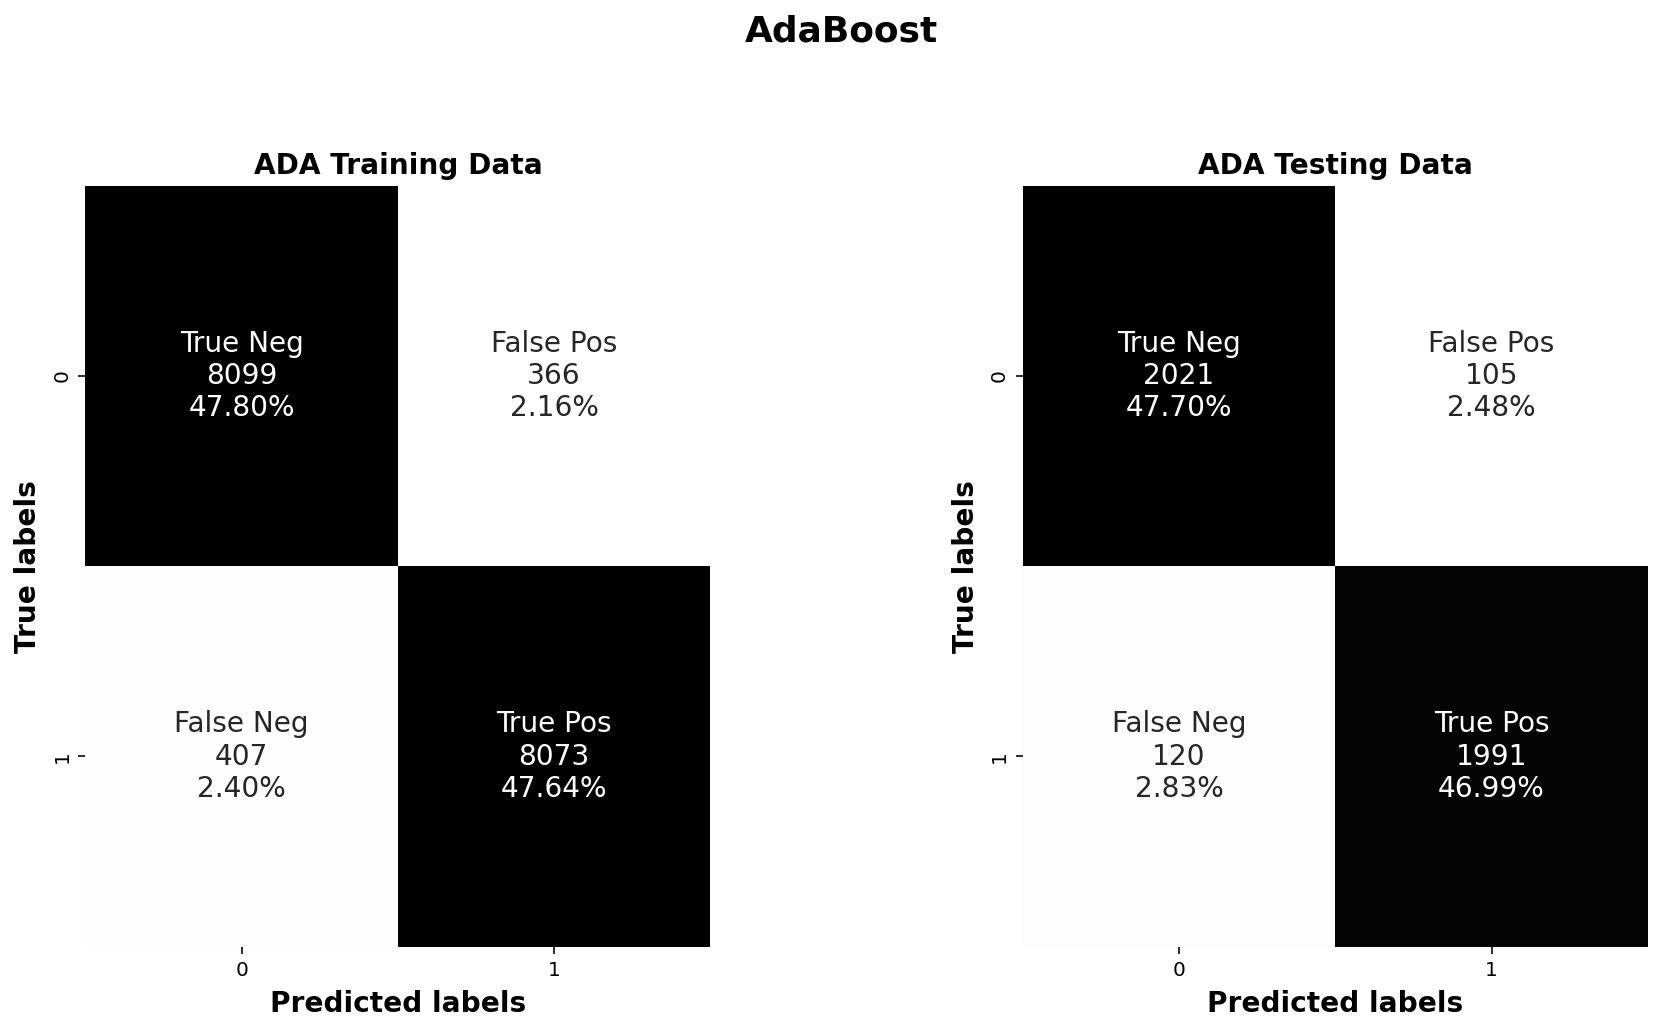

In [24]:
print("AdaBoost Classifier")
# Perform hyperparameter tuning for AdaBoost
best_params_ada, train_metrics_ada, test_metrics_ada, elapsed_total_ada = perform_randomized_search(clf_ada, param_grid_ada, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_ada_best = AdaBoostClassifier(**best_params_ada)
clf_ada_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_ada = clf_ada_best.predict(X_train)
test_predictions_ada = clf_ada_best.predict(X_test)

# Store results 
ada_results = {
    'best_params': best_params_ada,
    'train_metrics': train_metrics_ada,
    'test_metrics': test_metrics_ada,
    'elapsed_total': elapsed_total_ada,
    'test_predictions': test_predictions_ada
}

# Displaying the model metrics
print("Best Parameters:", best_params_ada)
display_metrics('Ada Boost', train_metrics_ada, test_metrics_ada)

# Plot confusion matrix for training data
titles = ['ADA Training Data', 'ADA Testing Data']
plot_confusion_matrices_side_by_side('AdaBoost', [(y_train, train_predictions_ada), (y_test, test_predictions_ada)], titles)

# XGBoost

XGBoost Classifier
Starting hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Searching...
Best Parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}

XGBoost



,accuracy,precision,recall,f1,roc_auc
Train,1.0000,1.0000,1.0000,1.0000,1.0000
Test,0.9806,0.9815,0.9796,0.9806,0.9806


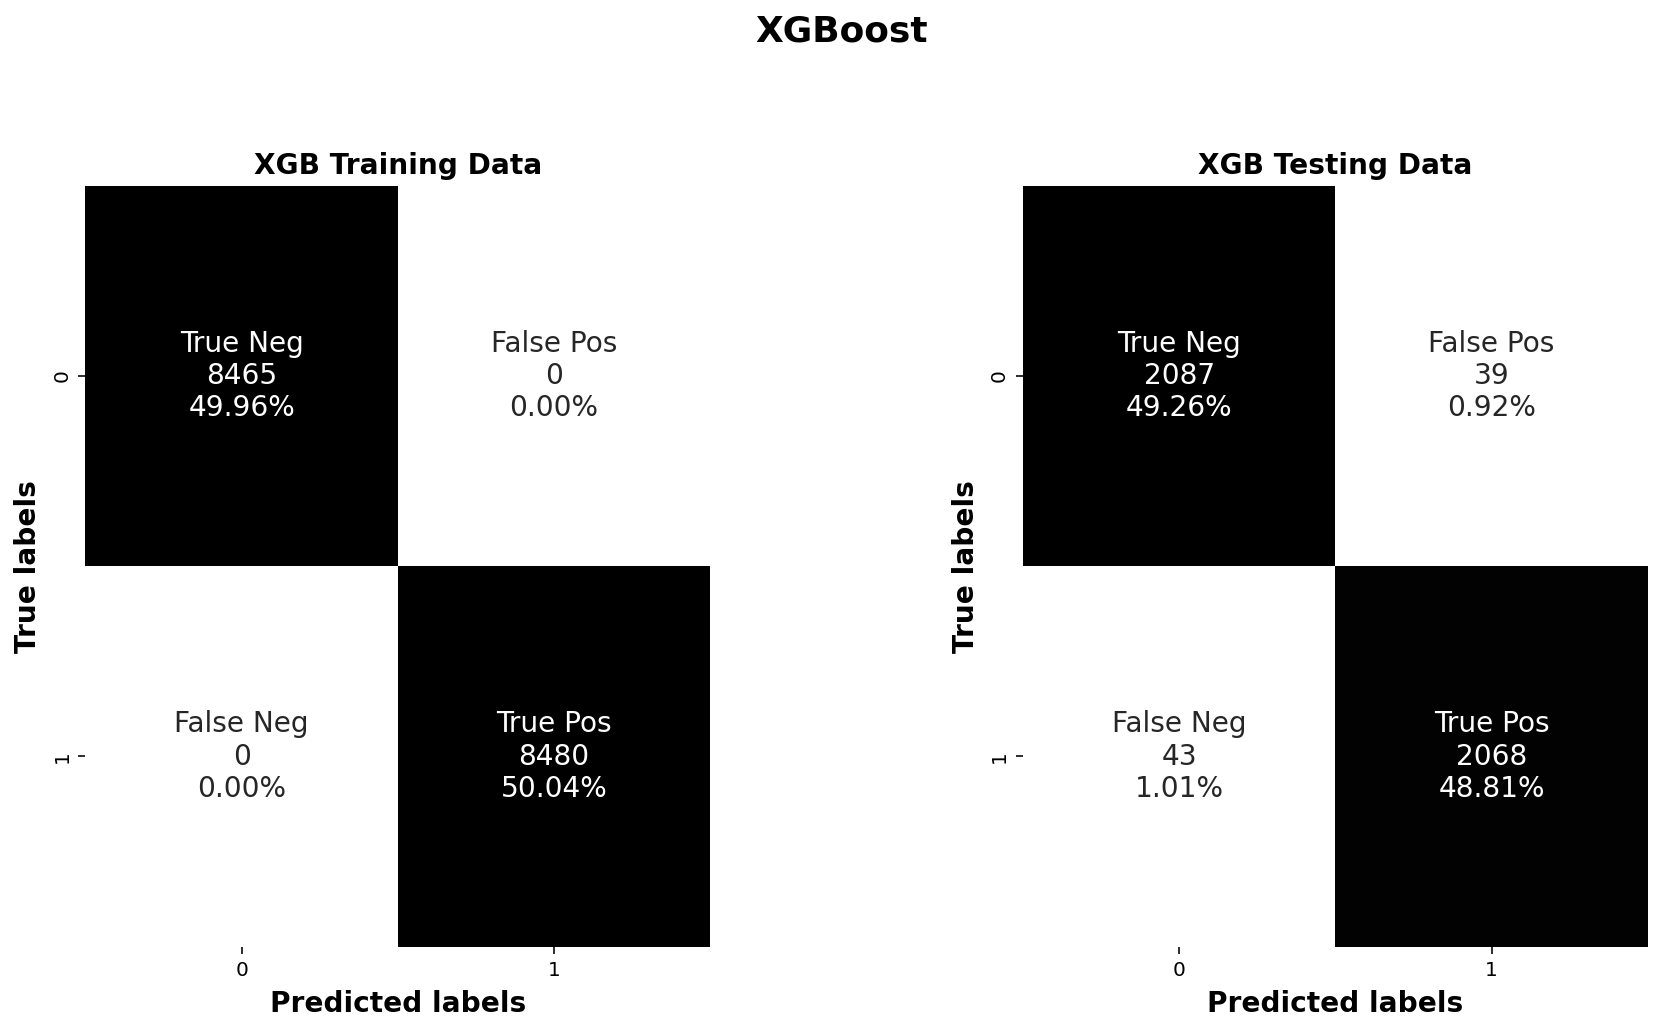

In [25]:
print("XGBoost Classifier")
# Perform hyperparameter tuning for XGBoost
best_params_xgb, train_metrics_xgb, test_metrics_xgb, elapsed_total_xgb = perform_randomized_search(clf_xgb, param_grid_xgb, X_train, y_train, X_test, y_test)

# Fit the model with the best hyperparameters
clf_xgb_best = XGBClassifier(**best_params_xgb)
clf_xgb_best.fit(X_train, y_train)

# Obtain predictions
train_predictions_xgb = clf_xgb_best.predict(X_train)
test_predictions_xgb = clf_xgb_best.predict(X_test)

# Store results 
xgb_results = {
    'best_params': best_params_xgb,
    'train_metrics': train_metrics_xgb,
    'test_metrics': test_metrics_xgb,
    'elapsed_total': elapsed_total_xgb,
    'test_predictions': test_predictions_xgb
}

# Displaying the model metrics
print("Best Parameters:", best_params_xgb)
display_metrics('XGBoost', train_metrics_xgb, test_metrics_xgb)

# Plot confusion matrix for training data
titles = ['XGB Training Data', 'XGB Testing Data']
plot_confusion_matrices_side_by_side('XGBoost', [(y_train, train_predictions_xgb), (y_test, test_predictions_xgb)], titles)

# Bar Graph of Model Performance

In [26]:
# Define model names and their corresponding results
models = ['LR', 'RF', 'SVC', 'EN', 'ADA', 'GB', 'XGB']
results = [lr_results, rf_results, svc_results, en_results, ada_results, gb_results, xgb_results]

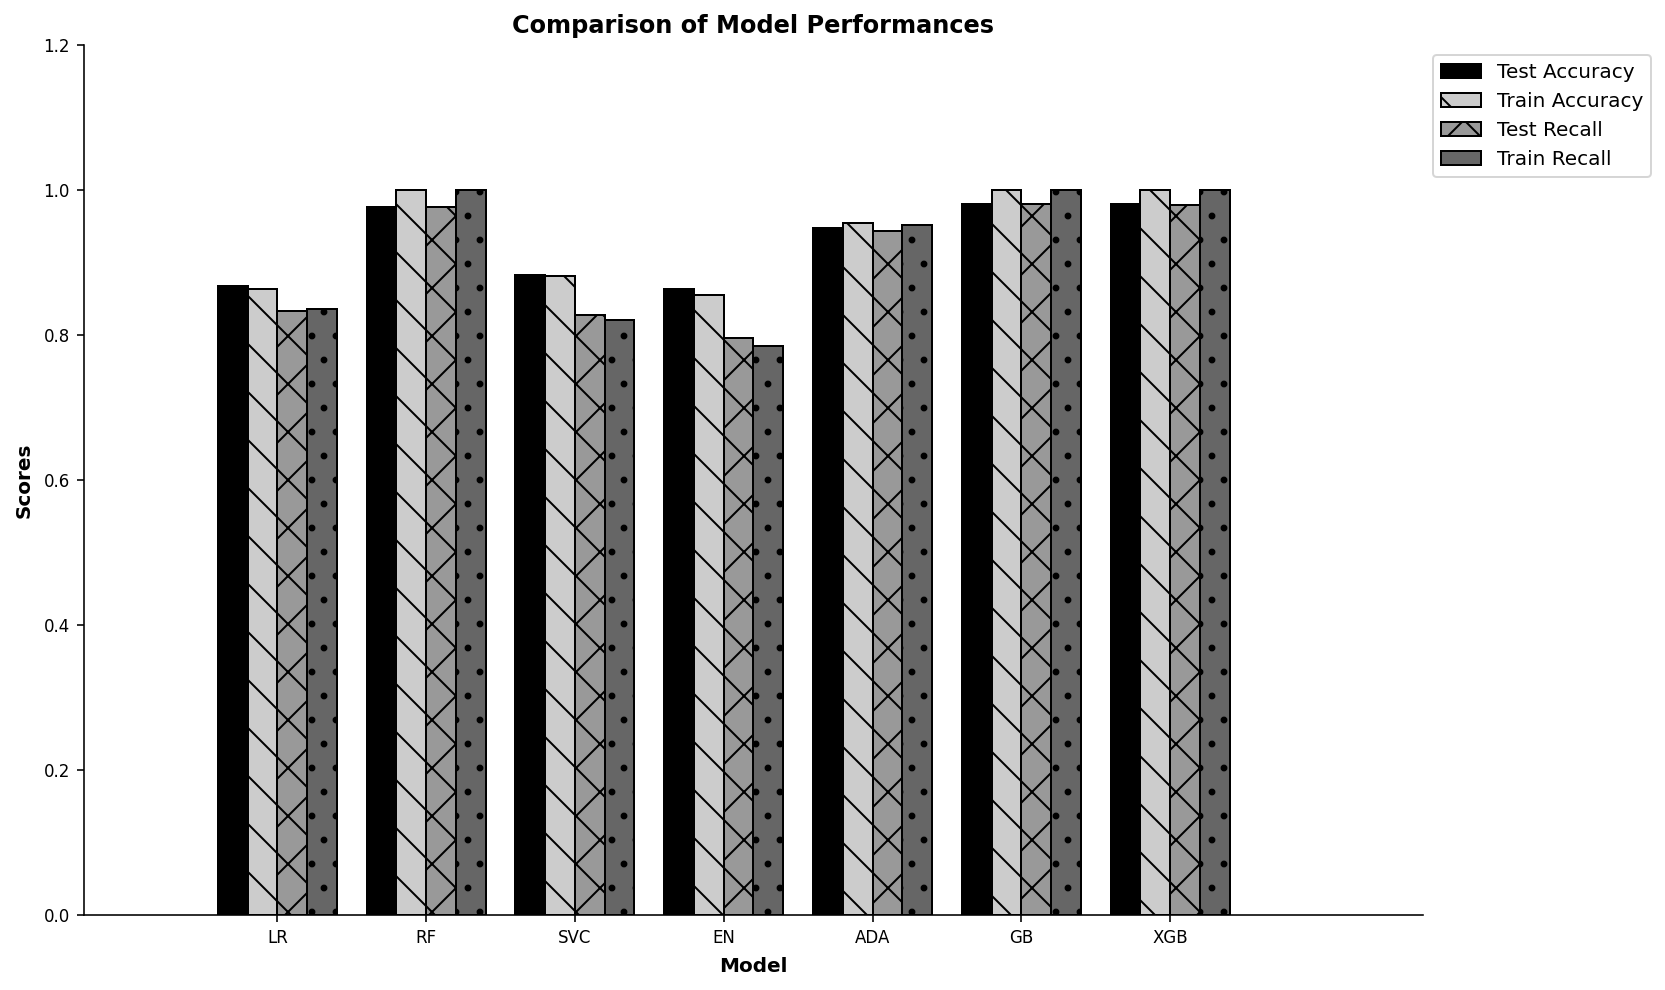

In [27]:
# Extract test and train accuracy scores for each model
test_accuracies = [result['test_metrics']['accuracy'] for result in results]
train_accuracies = [result['train_metrics']['accuracy'] for result in results]

# Extract test and train recall scores for each model
test_recalls = [result['test_metrics']['recall'] for result in results]
train_recalls = [result['train_metrics']['recall'] for result in results]

# Bar width
bar_width = 0.2
index = np.arange(len(models))
# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 8))

# Plot test accuracy
plt.bar(index, test_accuracies, bar_width, edgecolor='black', hatch='/', label='Test Accuracy')
# Plot train accuracy
plt.bar(index + bar_width, train_accuracies, bar_width, edgecolor='black', hatch='\\', label='Train Accuracy')

# Plot test recall
plt.bar(index + 2*bar_width, test_recalls, bar_width, edgecolor='black', hatch='x', label='Test Recall')
# Plot train recall
plt.bar(index + 3*bar_width, train_recalls, bar_width, edgecolor='black', hatch='.', label='Train Recall')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Model Performances')
plt.xticks(index + 1.5*bar_width, models)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


# ROC Curves of the Models

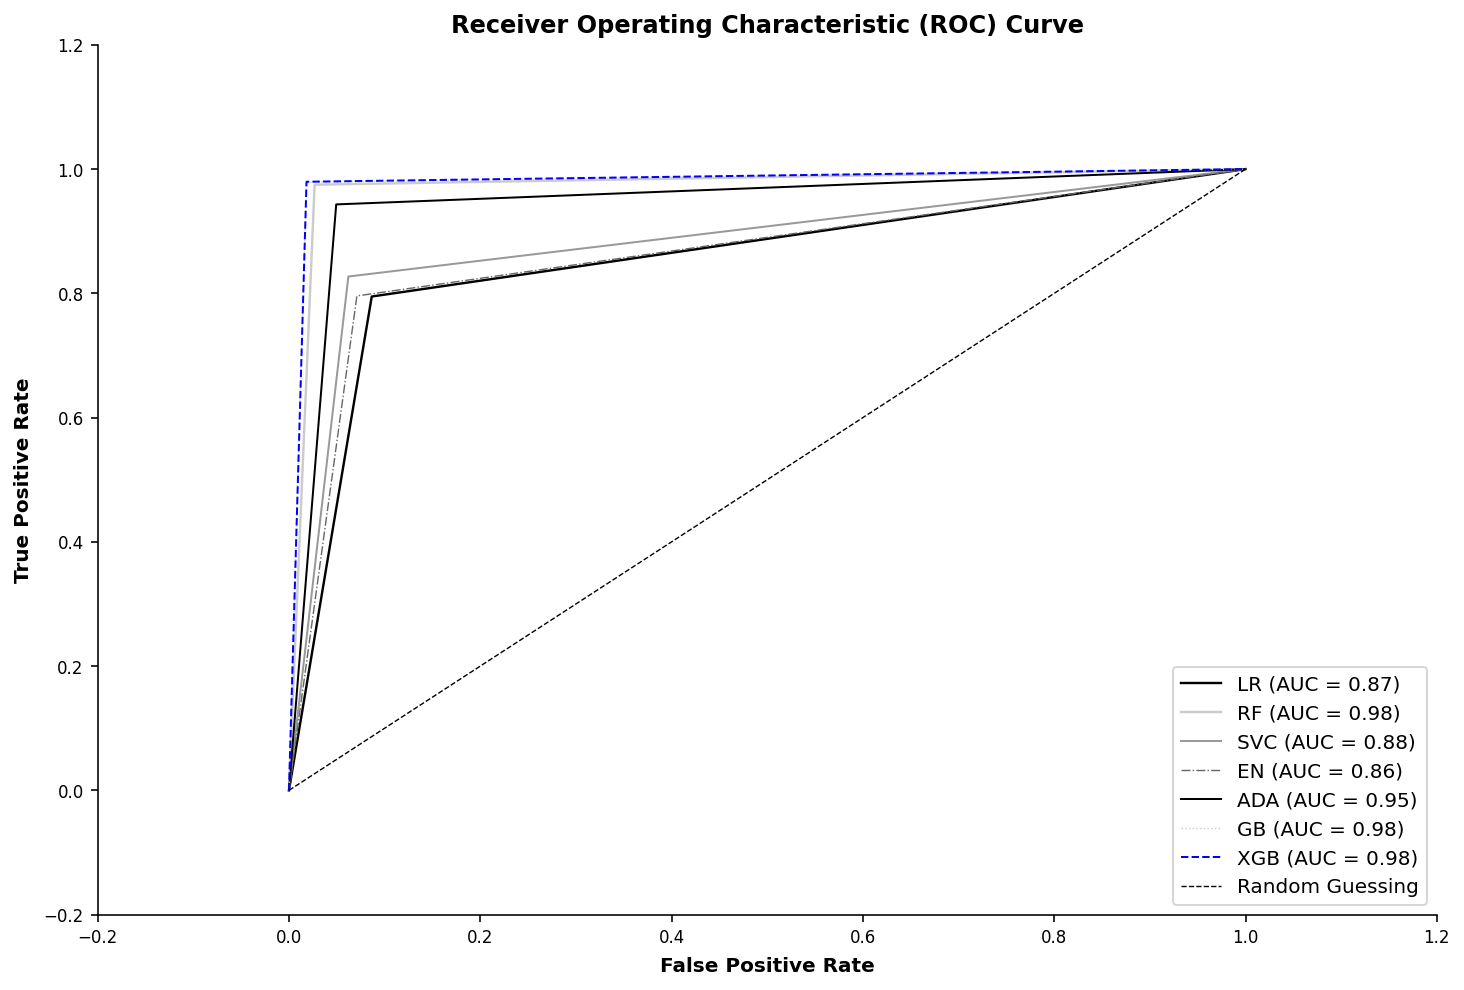

In [28]:
# Plot ROC curves for each model
plt.figure(figsize=(12, 8))

for model_name, result in zip(models, results):
    # Get the correct test predictions variable for the current model
    if 'test_predictions' in result:
        test_predictions = result['test_predictions']
    elif 'test_metrics' in result and 'predictions' in result['test_metrics']:
        test_predictions = result['test_metrics']['predictions']
    else:
        raise KeyError(f"Test predictions not found for model: {model_name}")
        
    # Compute ROC curve for test data
    fpr, tpr, _ = roc_curve(y_test, test_predictions)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["test_metrics"]["roc_auc"]:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()


In [29]:
# Function to apply different highlighting based on column names
def highlight_max_min(col):
    if col.name.startswith('Elapsed Total Time (s)'):
        max_val = col.max()
        min_val = col.min()
        return ['background-color: #FFD699' if x == max_val else 'background-color: #ADD8E6' if x == min_val else '' for x in col]
    else:
        return ['background-color: #D3ECA1' if x == col.max() else '' for x in col]

In [30]:
# Create a list of dictionaries containing the test scores and elapsed total time for each model
original_scores = []
for model_name, result in zip(models, results):
    original_scores.append({
        'Model': model_name,
        'Accuracy': result['test_metrics']['accuracy'],
        'Precision': result['test_metrics']['precision'],
        'Recall': result['test_metrics']['recall'],
        'F1 Score': result['test_metrics']['f1'],
        'ROC AUC': result['test_metrics']['roc_auc'],
        'Elapsed Total Time (s)': result['elapsed_total']
    })

# Create a DataFrame from the list of dictionaries
scores_df = pd.DataFrame(original_scores)

# Set the 'Model' column as the index
scores_df.set_index('Model', inplace=True)

# Find the maximum value for each train score
max_accuracy = scores_df['Accuracy'].max()
max_recall = scores_df['Recall'].max()
max_precision = scores_df['Precision'].max()
max_f1 = scores_df['F1 Score'].max()
max_roc_auc = scores_df['ROC AUC'].max()

# Find the minimum value for elapsed total time
min_time = scores_df['Elapsed Total Time (s)'].min()
max_time = scores_df['Elapsed Total Time (s)'].max()

scores_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Elapsed Total Time (s)
Model,,,,,,
LR,0.867831,0.894255,0.833254,0.862678,0.867709,29.552393
RF,0.975926,0.975841,0.975841,0.975841,0.975926,140.094601
SVC,0.882700,0.929712,0.827096,0.875407,0.882504,2850.723890
EN,0.862639,0.917531,0.795831,0.852359,0.862403,461.795310
ADA,0.946896,0.949905,0.943155,0.946518,0.946883,61.570692
GB,0.980883,0.981043,0.980578,0.980810,0.980882,211.223849
XGB,0.980647,0.981490,0.979631,0.980560,0.980643,82.338335


In [31]:
# Apply the styling function to highlight the maximum value in each column
styled_df = scores_df.style.apply(highlight_max_min)

# Display the styled DataFrame
styled_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Elapsed Total Time (s)
Model,,,,,,
LR,0.867831,0.894255,0.833254,0.862678,0.867709,29.552393
RF,0.975926,0.975841,0.975841,0.975841,0.975926,140.094601
SVC,0.882700,0.929712,0.827096,0.875407,0.882504,2850.723890
EN,0.862639,0.917531,0.795831,0.852359,0.862403,461.795310
ADA,0.946896,0.949905,0.943155,0.946518,0.946883,61.570692
GB,0.980883,0.981043,0.980578,0.980810,0.980882,211.223849
XGB,0.980647,0.981490,0.979631,0.980560,0.980643,82.338335


Fitting 3 folds for each of 23 candidates, totalling 69 fits
[CV] END ................................pca__n_components=1; total time=   3.2s
[CV] END ................................pca__n_components=1; total time=   3.1s
[CV] END ................................pca__n_components=1; total time=   3.2s
[CV] END ................................pca__n_components=2; total time=   5.0s
[CV] END ................................pca__n_components=2; total time=   5.1s
[CV] END ................................pca__n_components=2; total time=   5.0s
[CV] END ................................pca__n_components=3; total time=   6.8s
[CV] END ................................pca__n_components=3; total time=   6.8s
[CV] END ................................pca__n_components=3; total time=   6.8s
[CV] END ................................pca__n_components=4; total time=   8.6s
[CV] END ................................pca__n_components=4; total time=   8.7s
[CV] END ................................pca__n_

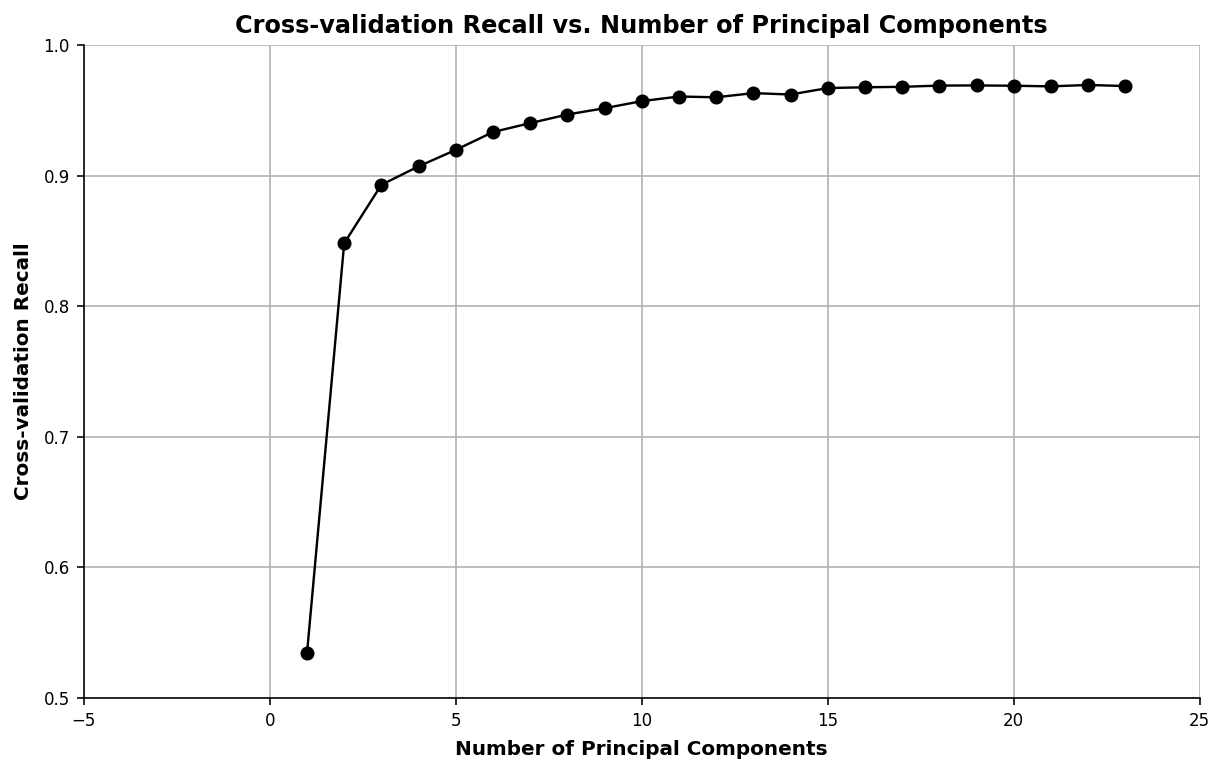

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define parameter grid for PCA 
param_grid = {
    'pca__n_components': range(1, min(X_train.shape[1], 200)),
}

# Define a custom scorer for recall
scorer = make_scorer(recall_score)

# Define the pipeline with PCA followed by GradientBoostingClassifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('gb', GradientBoostingClassifier(**best_params_gb))
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring=scorer, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve the best performing PCA and its corresponding score
best_pca = grid_search.best_params_['pca__n_components']
best_recall = grid_search.best_score_

# Print the best performing PCA and its corresponding score
print("Best Performing PCA (GradientBoost):", best_pca)
print("Best Cross-validation Recall (GradientBoost):", best_recall)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['pca__n_components'], grid_search.cv_results_['mean_test_score'], '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-validation Recall')
plt.title('Cross-validation Recall vs. Number of Principal Components')
plt.grid(True)
plt.show()


# Testing on unknown beats

In [33]:
unknown_beats.drop('type', axis=1, inplace=True)
unknown_beats.drop('record', axis=1, inplace=True)

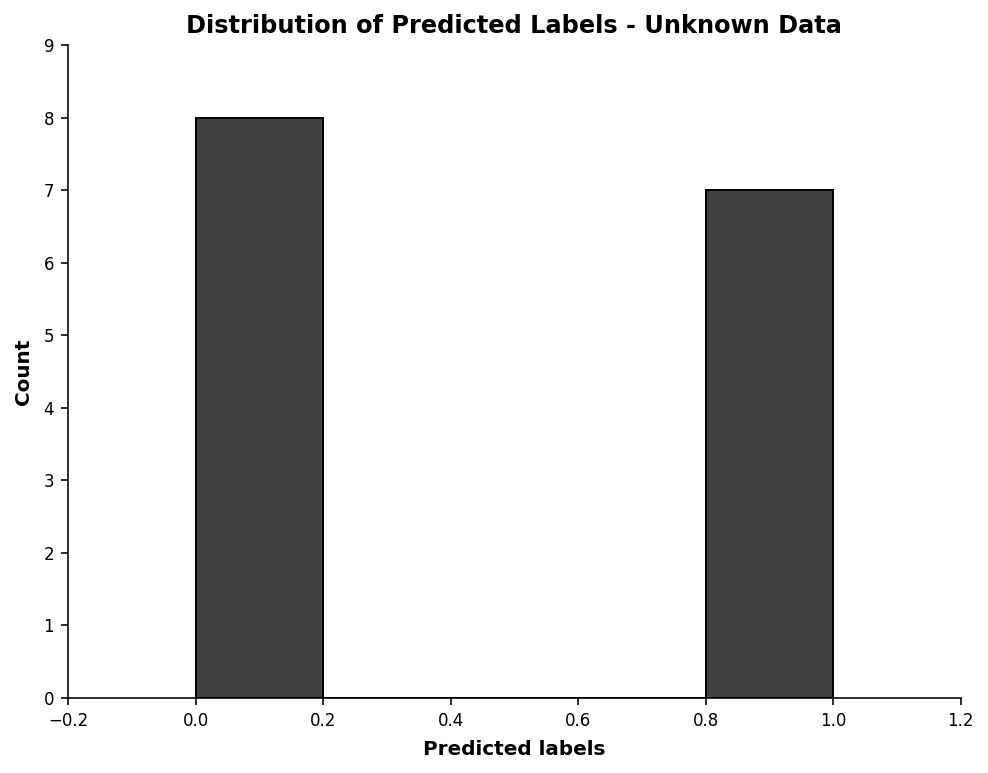

In [34]:
# Make predictions on unknown data
unknown_predictions_gb = clf_gb_best.predict(unknown_beats)
# Plot distribution of predicted labels
plt.figure(figsize=(8, 6))
sns.histplot(unknown_predictions_gb, kde=False)
plt.xlabel('Predicted labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels - Unknown Data')
plt.show()


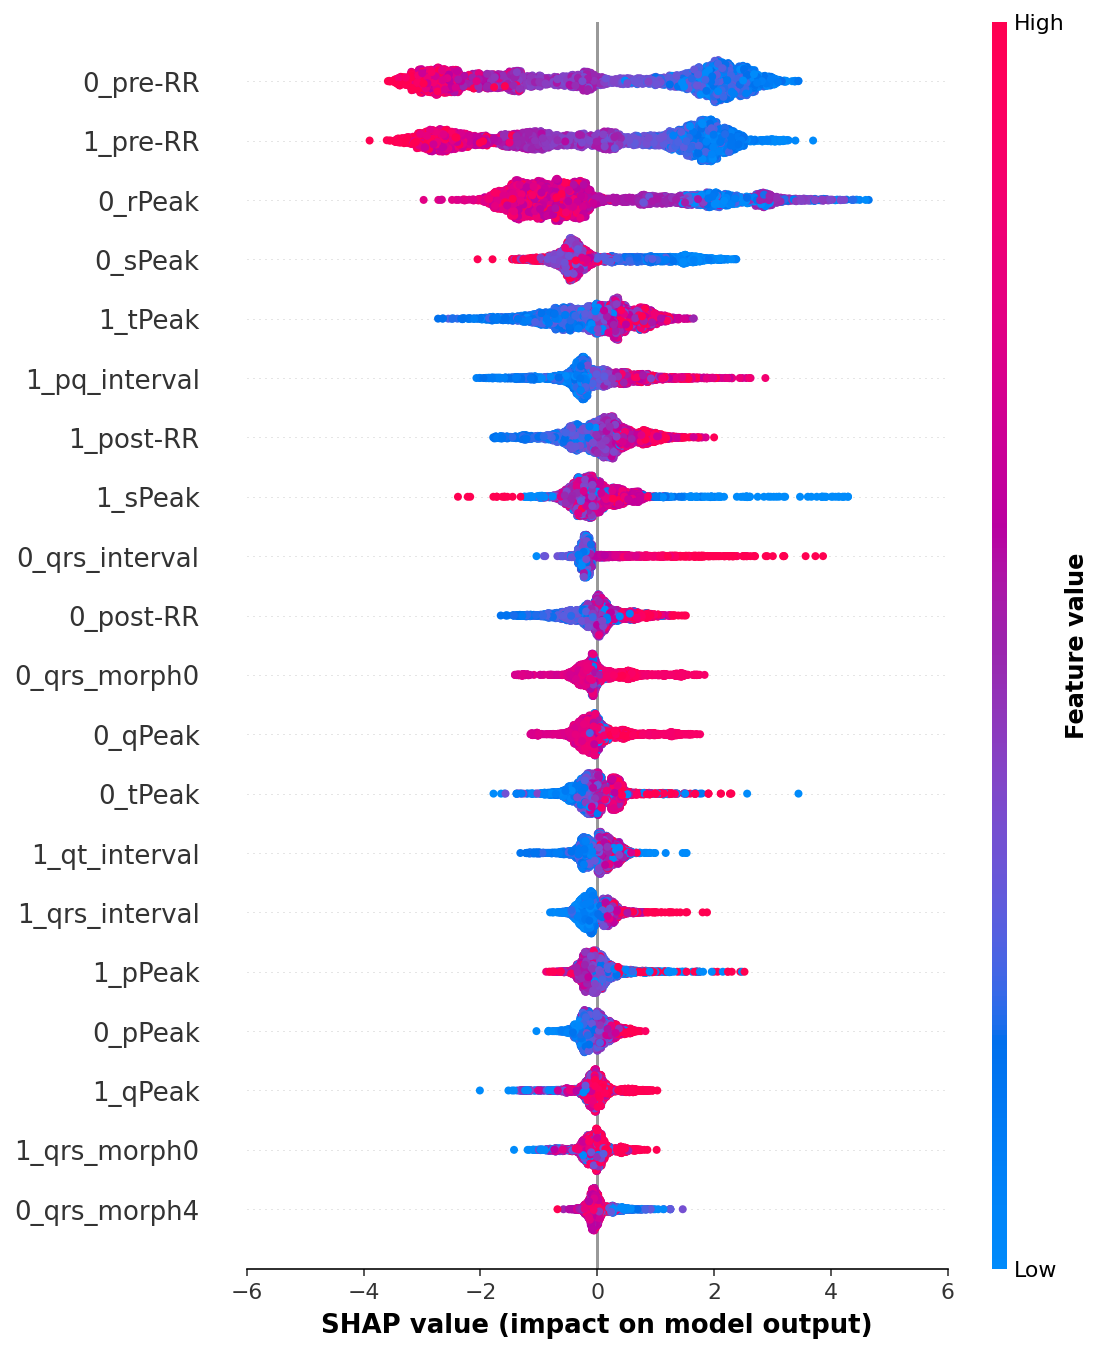

In [35]:
# Create a SHAP explainer object
explainer = shap.Explainer(clf_gb_best)

# Calculate SHAP values for the unknown data
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

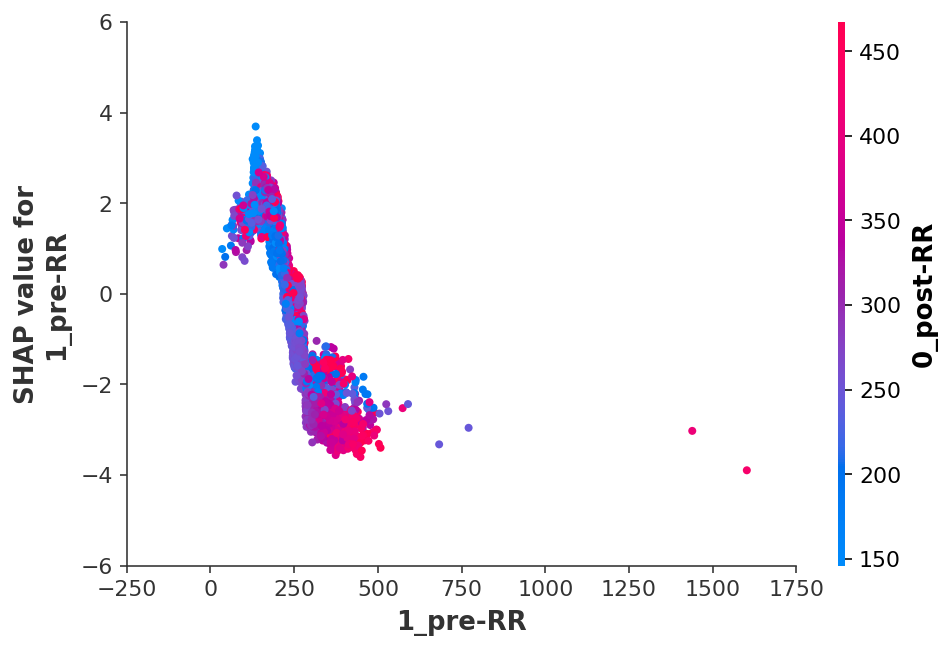

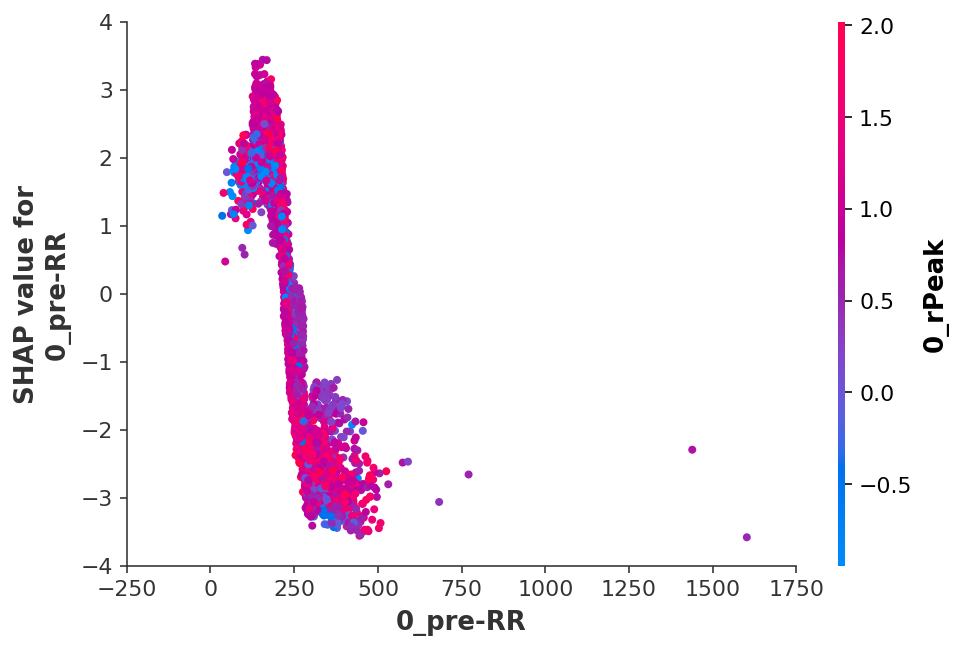

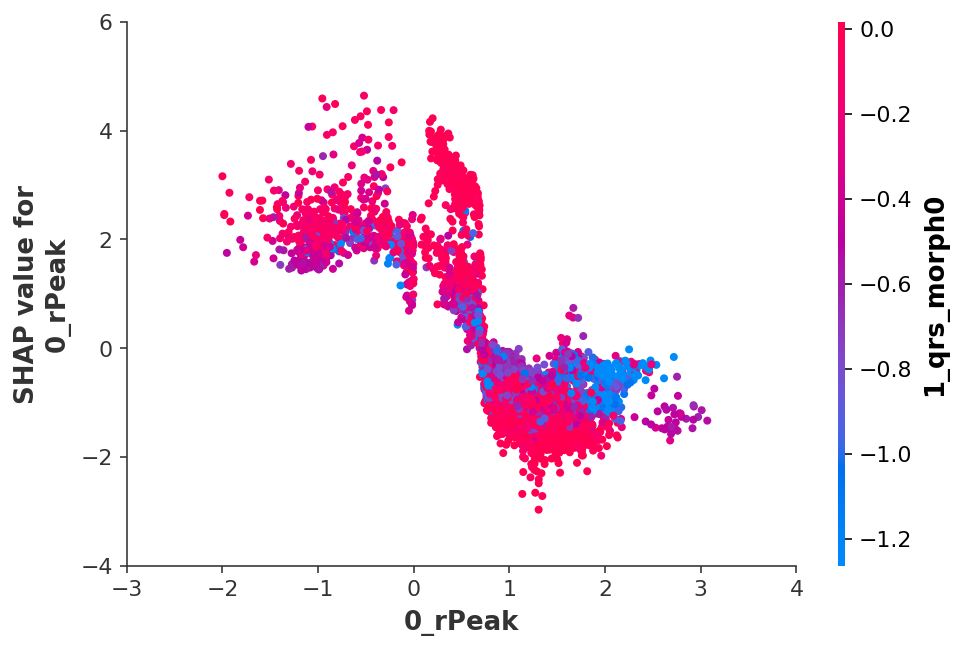

In [36]:
# Exploring top3 features
shap.dependence_plot("1_pre-RR", shap_values, X_test)
shap.dependence_plot("0_pre-RR", shap_values, X_test)
shap.dependence_plot("0_rPeak", shap_values, X_test)
#shap.dependence_plot("1_sPeak", shap_values, X_test)